# Time Series Visualization & Forecasting - Apple Stock Price

# Introduction
We will explore the exciting world of time series analysis, its significance in data-driven decision making, and how to effectively visualize and forecast data. The use case we will focus on is stock price analysis, a domain where time series plays a crucial role in understanding market trends and predicting future stock movements.

## Overview of Time Series Analysis

A time series is a sequence of data points indexed in time order. Time series analysis is the process of using statistical techniques to model and understand the underlying patterns and structures within the data. Time series data is prevalent across various domains, such as finance, economics, weather forecasting, and even in monitoring vital signs in healthcare.

The primary components of a time series are:

* **Trend**: The long-term movement of the data.
* **Seasonality**: Regular and predictable fluctuations that repeat over a specific period.
* **Cyclicity**: Fluctuations that do not follow a fixed pattern or period but are affected by external factors.
* **Irregular/Noise**: Random fluctuations that are unpredictable and not associated with any pattern.

## Importance of Time Series Visualization and Forecasting

Visualization and forecasting are vital aspects of time series analysis. They provide valuable insights and allow us to make data-driven decisions.

Time Series Visualization helps us:

* Understand the data's underlying patterns, trends, and seasonality.
* Identify anomalies or outliers in the data.
* Communicate insights effectively to stakeholders.

Time Series Forecasting enables us to:

* Predict future values based on historical data.
* Make informed decisions, such as investment strategies or resource allocation.
* Evaluate the effectiveness of interventions or policy changes.


## Use Case: Stock Price Analysis

Stock price analysis is a perfect example of how time series analysis can be applied in the real world. In finance, stock prices represent a series of data points over time, and understanding the trends, seasonality, and irregularities can provide valuable insights for investors.

# Dataset
One popular stock that has consistently engaged audiences and generated interest is Apple Inc. (AAPL). Apple's stock price movements often attract significant attention from both investors and the general public. The company's stock price history can reveal interesting insights into how the market has responded to various events, such as product launches, earnings reports, and global economic trends.

## Data Description
The Apple stock data (AAPL) available on Yahoo Finance offers historical and up-to-date stock prices for Apple Inc.
Link: https://finance.yahoo.com/quote/AAPL/history/

Here's a description of each column in the dataset:

1. **Date**: The date when the stock market data was recorded (YYYY-MM-DD format).
2. **Open**: The opening price of Apple's stock on that specific day.
3. **High**: The highest price at which Apple's stock was traded during the day.
4. **Low**: The lowest price at which Apple's stock was traded during the day.
5. **Close**: The closing price of Apple's stock on that specific day.
6. **Adj Close**: The adjusted closing price, which accounts for dividends, stock splits, and new stock offerings, providing a more accurate reflection of the stock's value over time.
7. **Volume**: The number of Apple's shares that were traded during the day.


#### Import the necessary libraries and download the AAPL dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/AAPL.csv')


## Data Preprocessing
#### Converting Date to DateTime Object

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
# displaying the AAPL dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


#### Plotting the entire history of the stock prices over time:

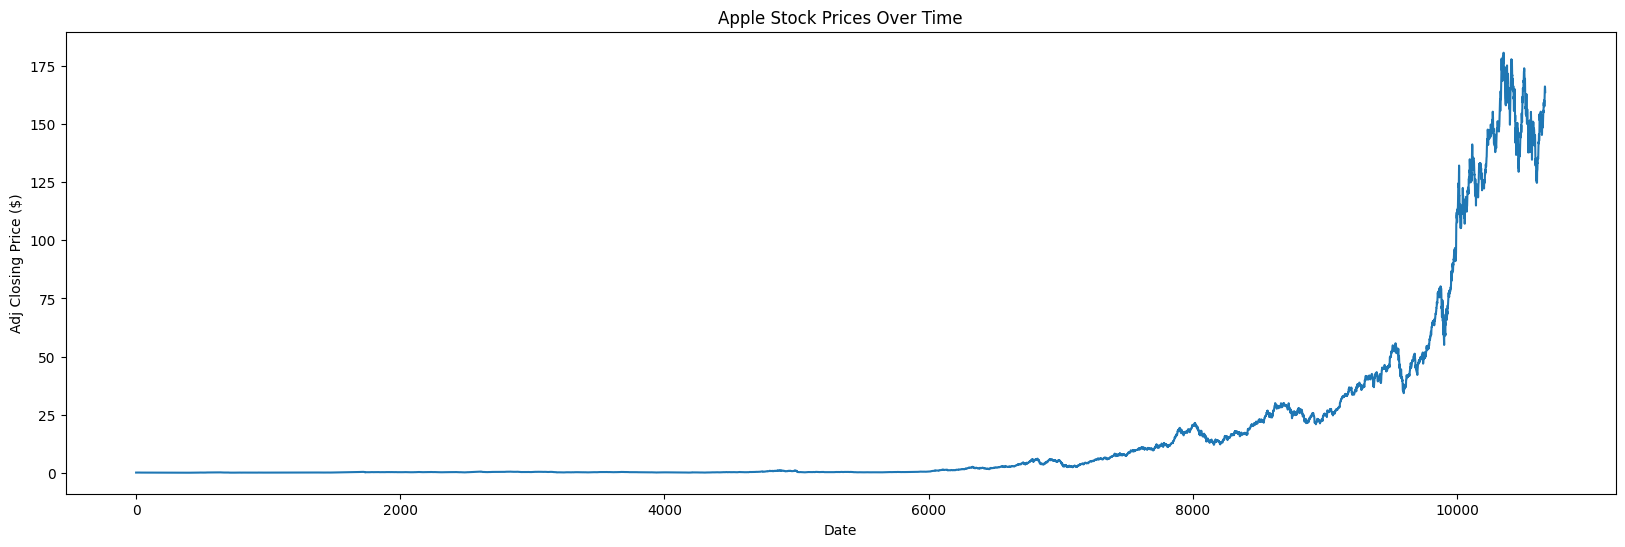

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adj Closing Price ($)")
plt.title("Apple Stock Prices Over Time")
plt.show()

## Key Moments in History
**Monthly Annualized Volatility** is a financial metric used to measure the variability or dispersion of an asset's returns over a one-month period, scaled up to represent a full year. 
* It is commonly used to quantify the level of risk associated with an investment, with higher volatility indicating greater uncertainty and potential price fluctuations. 
* This metric is calculated by taking the standard deviation of the asset's monthly returns, then multiplying it by the square root of 12 (the number of months in a year) to annualize the figure. 

Here we will use the Monthly Annualized Volatility metric to see the impact of key economic events on the stock price.

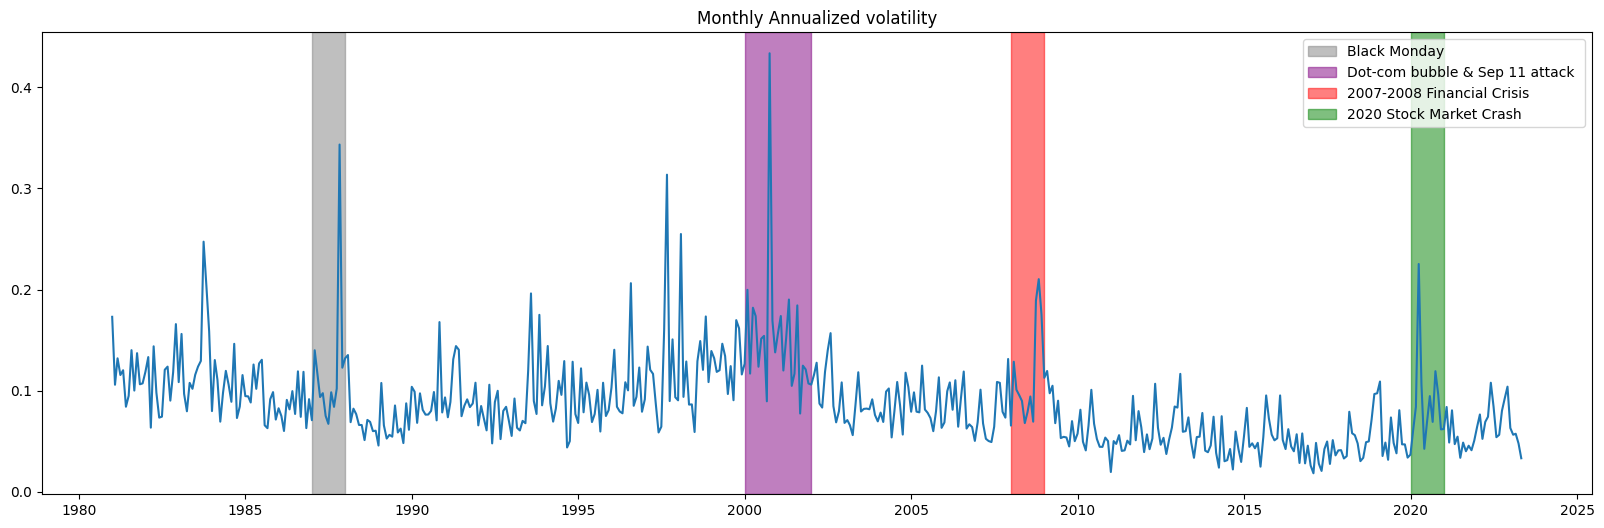

In [ ]:
# Set interceptate column as the index
newdf=df.set_index('Date')

#To model returns we will use daily % change
daily = newdf['Adj Close'].pct_change()
daily.dropna(inplace = True)

#Resample returns per month and take STD as measure of volatility
monthly=daily.resample("M").std()*np.sqrt(12)

import matplotlib.patches as mpatches

#Visulize major market events show up in the volatility
plt.figure(figsize=(20, 6))
plt.plot(monthly)
plt.axvspan('1987','1988',color='grey',alpha=.5)
plt.axvspan('2000','2002',color='purple',alpha=.5)
plt.axvspan('2008','2009',color='r',alpha=.5)
plt.axvspan('2020','2021',color='g',alpha=.5)
plt.title("Monthly Annualized volatility")
l1=mpatches.Patch(color='grey',alpha=.5, label="Black Monday")
l2=mpatches.Patch(color='purple',alpha=.5, label="Dot-com bubble & Sep 11 attack ")
l3=mpatches.Patch(color='red',alpha=.5, label="2007-2008 Financial Crisis")
l4=mpatches.Patch(color='green',alpha=.5, label="2020 Stock Market Crash")
plt.legend(handles=[l1,l2,l3,l4])

## Reducing the timeframe
Now that we have visualized the Apple stock price since it's inception. We will cut down the timeframe for preserving the relevancy of recent data and computational efficiency.

In 2007, Apple Inc. experienced several significant events, most notably the introduction of the first iPhone.

In [ ]:
start_date = "2007-01-01"
end_date = "2022-12-31"

newdf = newdf.loc[start_date:end_date]

#### Plotting the data since 2007 and adding moving averages to the plot:

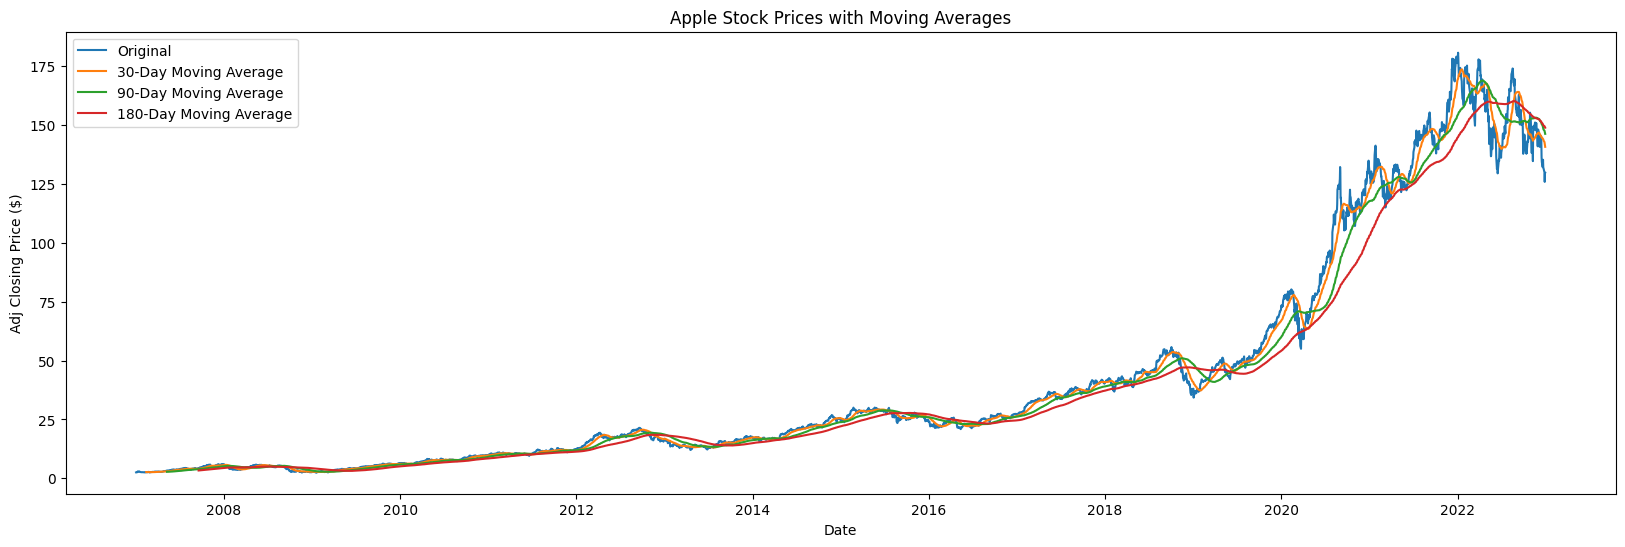

In [ ]:
def plot_moving_averages(data, window_sizes):
    plt.figure(figsize=(20, 6))
    plt.plot(data["Adj Close"], label="Original")
    
    for window_size in window_sizes:
        rolling_mean = data["Adj Close"].rolling(window=window_size).mean()
        plt.plot(rolling_mean, label=f"{window_size}-Day Moving Average")
    
    plt.xlabel("Date")
    plt.ylabel("Adj Closing Price ($)")
    plt.title("Apple Stock Prices with Moving Averages")
    plt.legend()
    plt.show()

plot_moving_averages(newdf, window_sizes=[30, 90, 180])

**Moving Averages**: The moving averages plot smoothens the stock price data and helps to identify the general trend. As the window size increases, the curve becomes smoother, making it easier to visualize the overall trend. From the moving averages, we can observe that Apple's stock has experienced a strong and consistent upward trend over the years.

## Monthly Resampling
Monthly sampling of daily stock prices can be advantageous for prediction and analysis in certain contexts. Some reasons for using monthly data include:
* Reduced noise
* Lower computational complexity
* Easier interpretation
* Reduced impact of micro-events
* Smoothing seasonality
* Aligning with reporting periods

In [ ]:
# Resample the data to the monthly level
monthly_mean = newdf['Adj Close'].resample('M').mean()

In [ ]:
monthly_data = monthly_mean.to_frame()

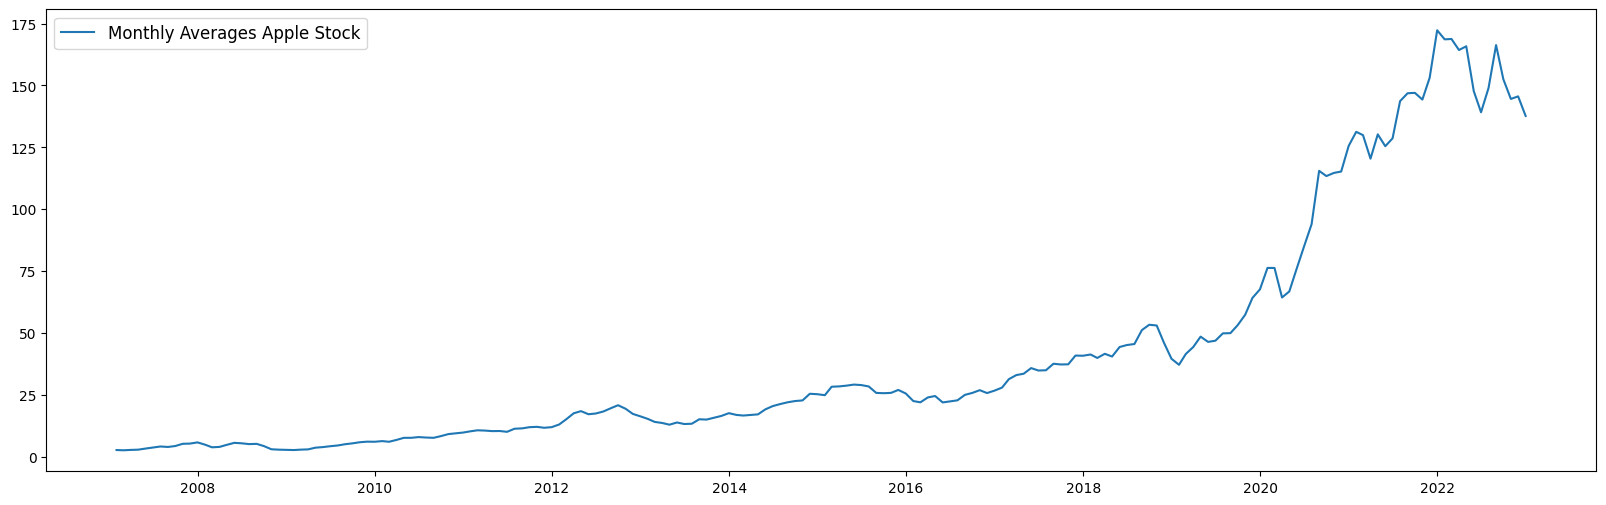

In [ ]:
##Monthly Stock Price 
fig = plt.figure(figsize=(20,6))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.legend(prop={'size': 12})
plt.show()

#### Observation: 
* We can observe an overall uptrend from 2007 to 2021
* However, we can observe that stock entered into a consolidation phase in 2022

## Identifying Seasonal Patterns

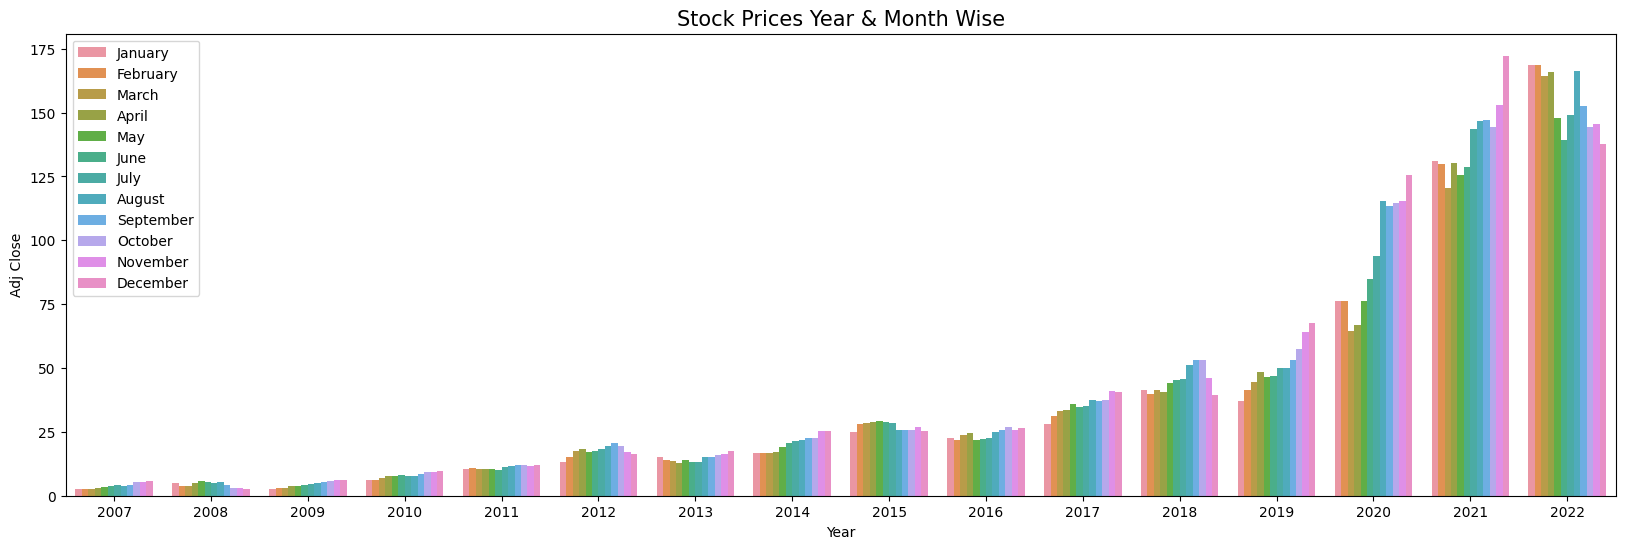

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['Quarter'] = monthly_data.index.quarter
fig, ax = plt.subplots(figsize=(20,6))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

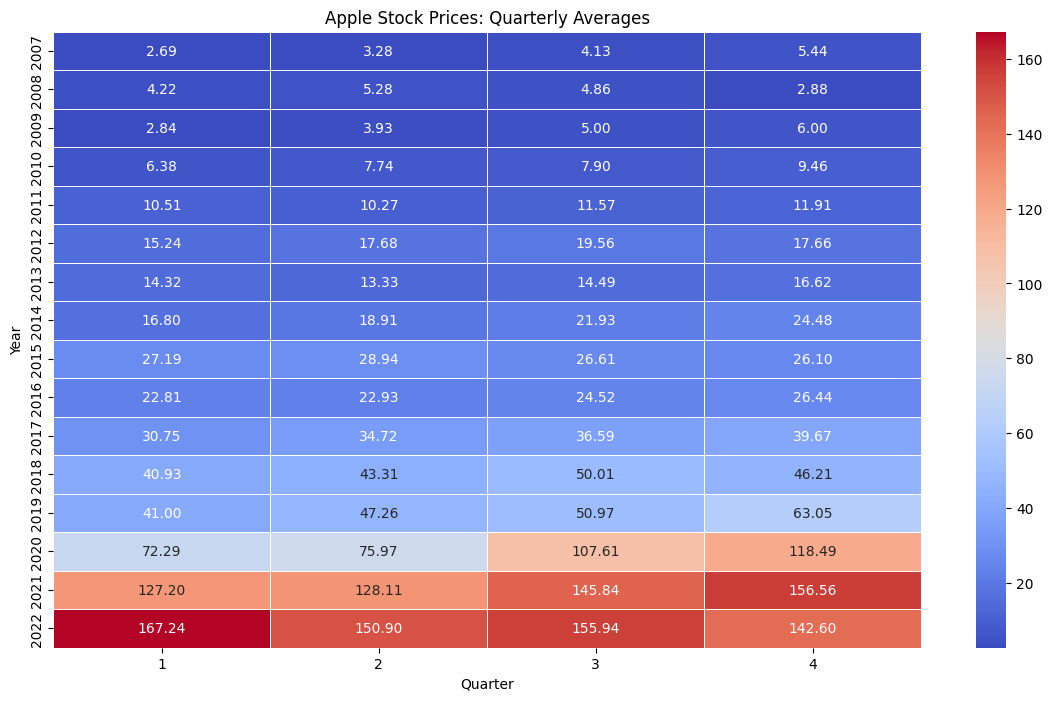

In [ ]:
quarter = monthly_data.groupby(["Year", "Quarter"])["Adj Close"].mean().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(quarter, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Apple Stock Prices: Quarterly Averages")
plt.show()

#### Observation:
* We can observe that Quarter 3 & 4 have generally higher prices compared to Quarter 1 & 2
* The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products and the Holiday period
* We can observe a decline in the stock price in 2022, due to production issues and price adjustments for all the Big Tech Firms
We will remove the 2022 data from the forecasting piece as it is driven by external factors 


In [ ]:
end_date = "2019-12-31"
monthly_data = monthly_data.loc[:end_date]

# Decomposition of Time Series

<Figure size 3000x1200 with 0 Axes>

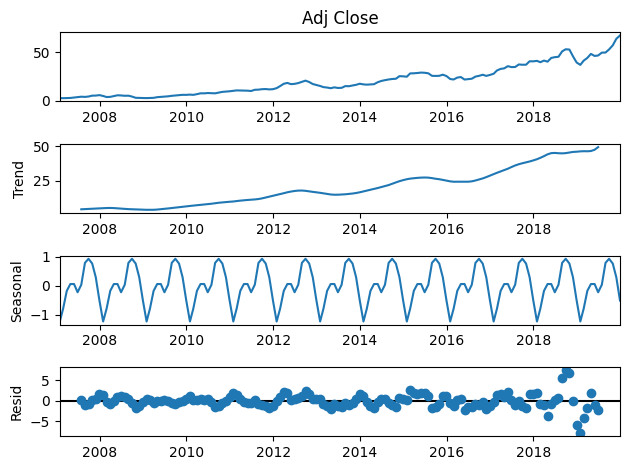

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

plt.figure(figsize=(30,12))
decomposed_series = sd(monthly_data['Adj Close'])
decomposed_series.plot()
plt.show()

#### Inferences :-

* **Trend** : Overall an Upward Trend

* Seasonality :There appears to be seasonality. AAPL has rallied during the Holiday season as expected. Since Holiday period has good sales for Apple Over the Years.

<Axes: xlabel='Date'>

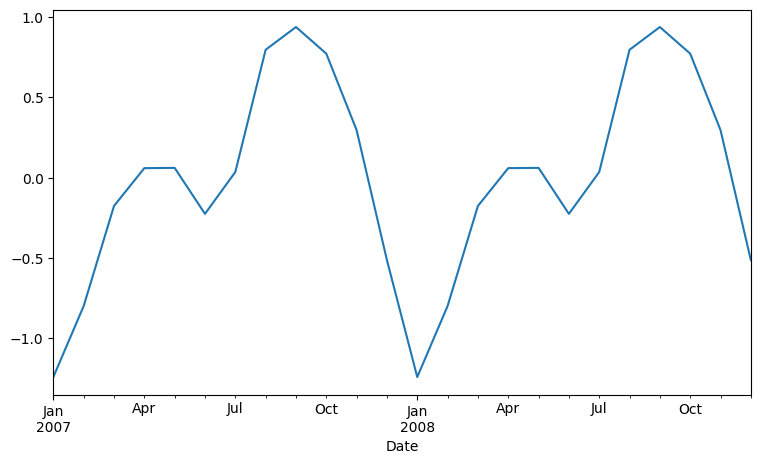

In [ ]:
##Drilling Down and Observing Seasonality
fig = plt.figure(figsize=(9,5))
decomposed_series.seasonal['2007':'2008'].plot()

## Stationarity Test of Time Series

For the ease of automation, we will be Using **Augmented Dickey-Fuller(ADF) Test**

**Null Hypothesis** : Time series is non-stationary

**Alternate Hypothesis** : Time series is stationary

Time Series is Stationary if we have constant mean, constant variance and No Trend and Seasonality.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis- Time Series is Stationary')
  else:
    print('Failed to Reject Null Hypothesis- Time Series is Non-Stationary')

ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 2.422043
p-value: 0.999020
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578
Failed to Reject Null Hypothesis- Time Series is Non-Stationary


#### Observation
Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

## AutoCorrelation Function(ACF)
* ACF measures the linear dependence between data points in a time series at different time lags. It calculates the correlation coefficient between a variable and its lagged version for various time lags. A high autocorrelation value indicates that the observations are closely related to their preceding observations. 
* ACF is used to identify the appropriate order of the moving average (MA) component in a time series model.

Text(0.5, 0, 'Lags')

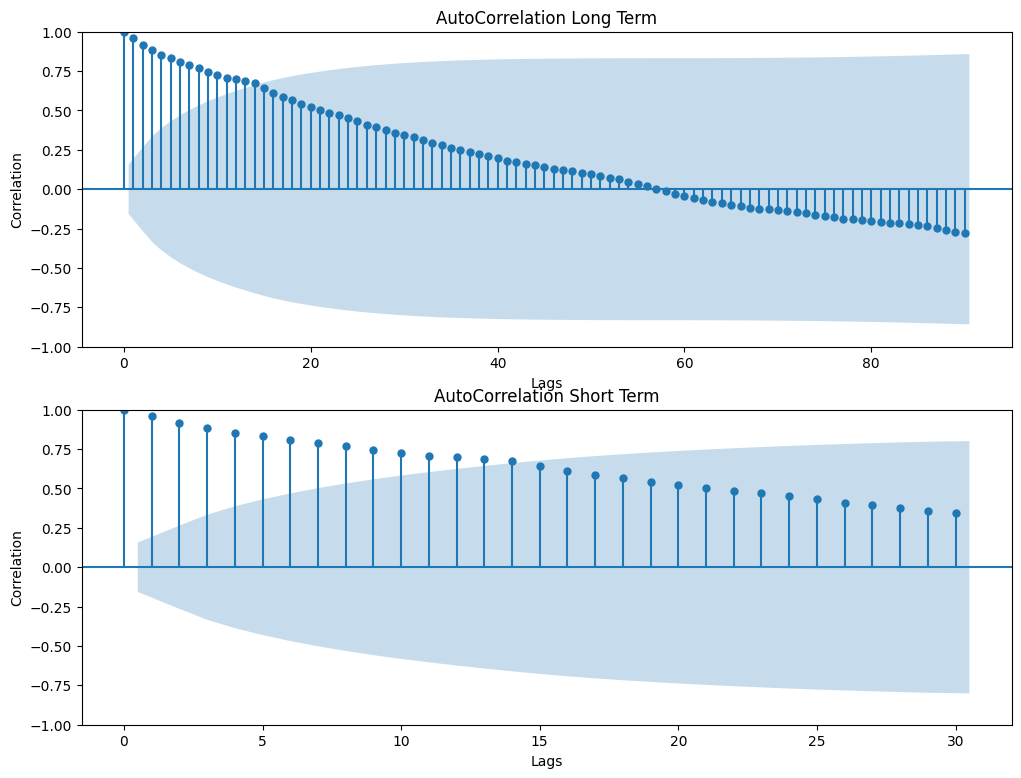

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

## Partial Autocorrelation Function(PACF)
* PACF measures the direct linear dependence between data points in a time series at a specific time lag, after removing the effect of any correlations at shorter lags. In other words, it calculates the correlation between a variable and its lagged version, while controlling for the influence of all intervening data points. 
* PACF is used to identify the appropriate order of the autoregressive (AR) component in a time series model.

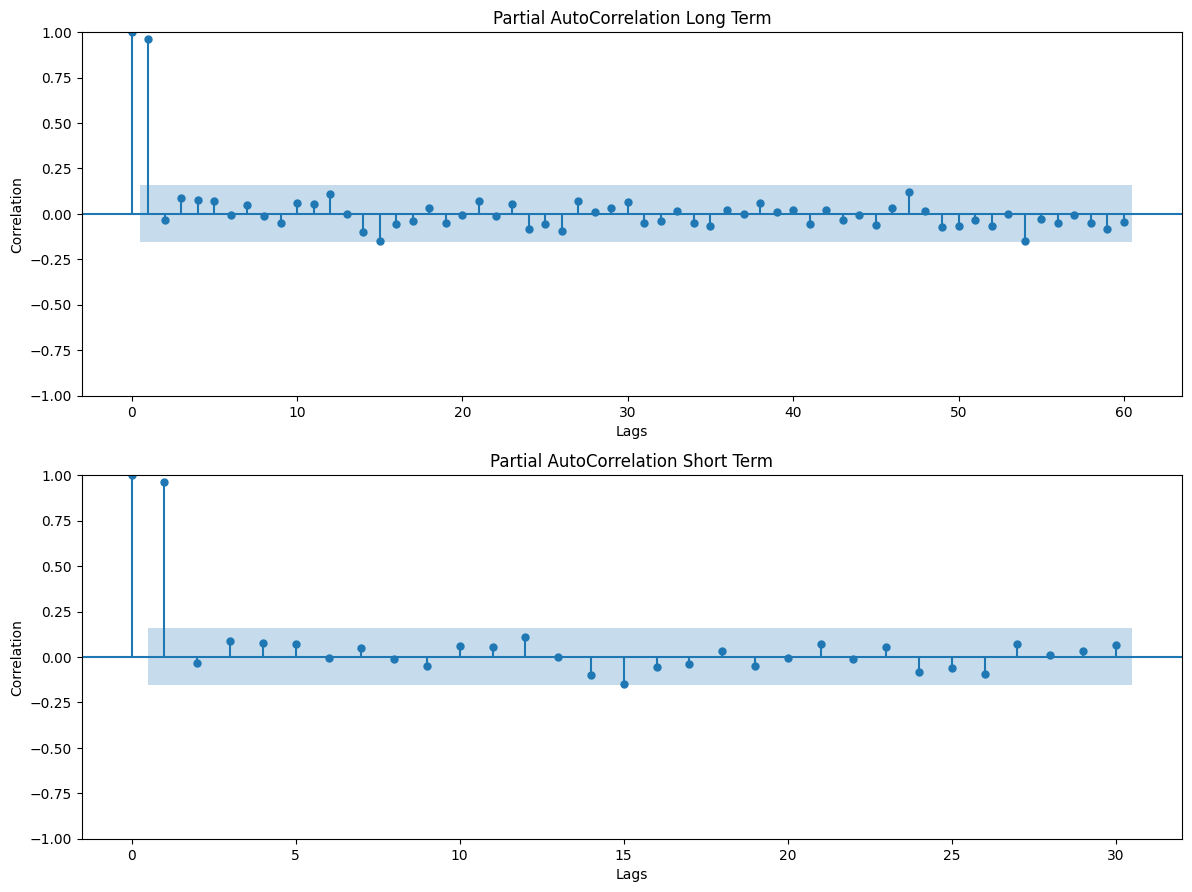

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
pacf = plot_pacf(monthly_data['Adj Close'],lags=60,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

## Transformation to make series stationary
We will use **First Order Differencing** to detrend the series 

In [ ]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

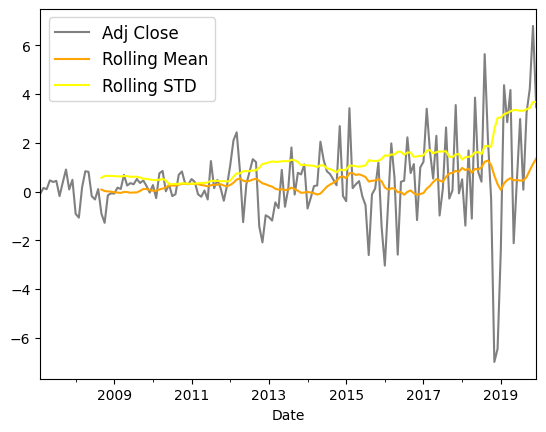

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

#### Observation
The series looks stationary as its having constant mean and variance

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -3.336385
p-value: 0.013328
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject Null Hypothesis- Time Series is Stationary


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


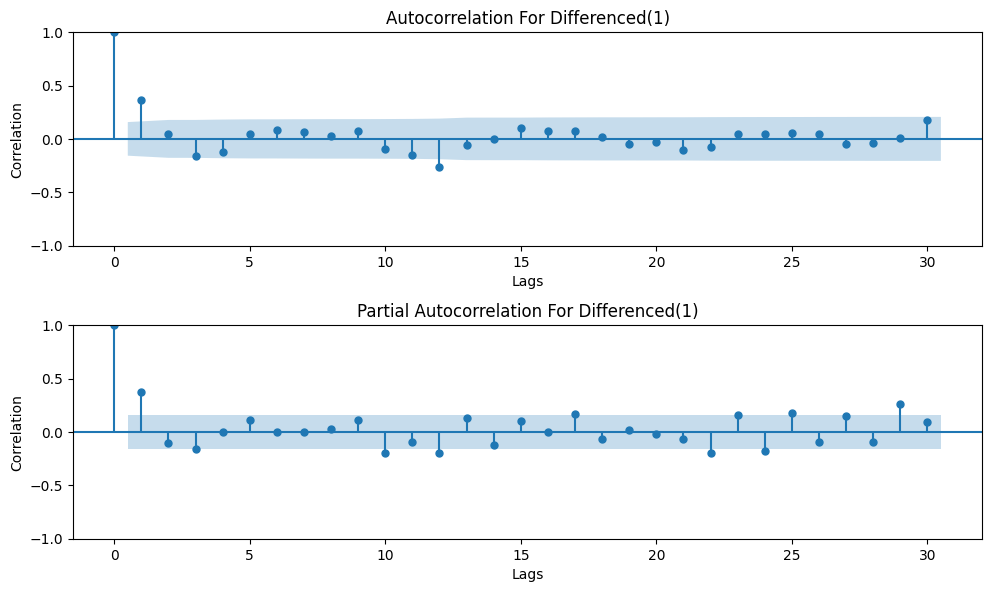

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,6))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# Seasonal ARIMA

In [ ]:
modelling_series = monthly_data['Adj Close']

In [ ]:
from sklearn.model_selection import train_test_split as split
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [ ]:
train.head()

Date
2007-01-31    2.701739
2007-02-28    2.605878
2007-03-31    2.754073
2007-04-30    2.848359
2007-05-31    3.307369
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
test.head()

Date
2014-10-31    22.752532
2014-11-30    25.437728
2014-12-31    25.258057
2015-01-31    24.860382
2015-02-28    28.278305
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
print('Train',len(train))
print('Test',len(test))

Train 93
Test 63


#### Hyperparameters
**SARIMA (p,d,q) (P,D,Q)m**

There are three trend elements that require configuration.

    p: Trend autoregression order.
    d: Trend difference order.
    q: Trend moving average order.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

    P: Seasonal autoregressive order.
    D: Seasonal difference order.
    Q: Seasonal moving average order.
    m: The number of time steps for a single seasonal period.


In [ ]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


**Akaike Information Criterion (AIC)** balances the goodness of fit with model complexity, helping to prevent overfitting and underfitting. 
* When using AIC in time series forecasting, the main goal is to find the model with the lowest AIC value, which indicates the best trade-off between model fit and complexity.
* AIC = -2 * log(likelihood) + 2 * k, where log(likelihood) is the natural logarithm of the likelihood of the model, and k is the number of estimated parameters.

In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

from statsmodels.tsa.statespace.sarimax import SARIMAX
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:715.890882203449
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:583.8630896260487


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:3072.393973972974
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:455.14856130119944
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:397.6719535142705


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2350.7251677461177
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:443.02999303222873
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:331.0333343981481


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:251.43697072442762
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:448.6133200120133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:415.9490672706379


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:2620.1729774859123
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:402.25359928594287
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:395.8215575472816


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1698.3554713842493
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:331.08688889206815
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:318.79146846406695


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:254.13956363024087
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:374.0637580829346
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:376.0636530991259
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:2589.5283575496596
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:326.27573887191033
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:327.96667631923566
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:324.89920139629515
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:268.1012027136939
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:256.5392531534193


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:253.04739208069662
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:591.748042466184
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:477.0134459694829
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:4389.080302822263
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:353.9711992250164
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:309.90601017478946
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:3719.822469215122
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:358.3687307416761
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:261.07127233293875


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:196.46795414482307
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:352.37920866493215
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:319.43358068283294


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:4524.478268408346
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:318.88713555133074
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:308.3216618222489


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:3351.709918079122
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:266.4607414271782
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:251.53864681701955


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:198.15620459215978
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:292.8765537275182
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:291.1949419074177


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:4343.034755557428
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:260.64020050971885
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:262.4034570976179
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:255.4099388687481
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:215.47635428677737
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:207.5160496033737


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:201.45597569100354
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:490.01103045852
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:404.0494887780624


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:4108.5168806802185
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:305.77988202247417
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:266.3348991400429


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:3705.489097724618
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:319.0356733494909
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:235.18949616147015


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:172.38409527017973
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:323.4612067499539
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:277.2733415951912


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:4198.782542232413
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:274.92109642930996
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:263.4045199581802
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:3499.844856535032
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:236.8444120826225
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:216.95617952196542


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:173.17006992115955
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:255.1062746489304
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:255.28343866937675


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:4137.338998761596
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:228.73040909788267
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:230.63845659347925
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:219.27164664539788
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:189.9367265898585
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:184.88265464030692


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:169.24450008848106
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:219.02753314834317
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:198.15690925061364


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:2396.547808257708
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:249.91183056853504
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:181.13762591773744


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:2452.8731153974586
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:285.75183244845425
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:201.415265543596


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:153.1928697939567
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:201.15925383306768
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:199.71146400180794
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:2529.6975564742297
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:197.4671488470011
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:189.61770592159579


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:2120.2682493528914
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:207.75753294686857
ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:192.67372082017567


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:159.46285699726886
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:178.03017119029258
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:180.02293274375606
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:2484.2578883933857
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:165.27536107139835
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:162.09775136175023
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:160.85435058382765
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:161.79632210365804
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:159.32677528255763


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:157.7257350077198
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:197.21746452750895
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:178.38583404453408
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:2385.5925410121104
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:231.47666083507912
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:167.39182491404156


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:2233.2606224836677
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:269.10362596434766
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:188.5968285729945


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:143.61242437937437
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:182.87214735047888
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:179.83843000558628
ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:2206.2538696145843
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:184.8150920072775
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:175.33474243266136


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:2020.1254935233655
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:197.56242672079406
ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:179.71918201613047


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:148.24806874036744
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:162.94144847529975
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:164.933297577194
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:2537.0699172667028
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:155.00994807313646
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:153.4993423945426
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:150.11646244220805
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:153.48541773224312
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:151.05863694176387


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:146.6468108128497
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:197.3309003645025
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:177.45083452765297


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:2256.3318645683753
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:230.79883313237863
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:167.36361344417992


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:2230.4952971863463
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:267.6566791114213
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:187.15355733825052


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:142.59024594960883
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:184.18606497323384
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:178.82540604806778
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:2117.4160154519845
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:185.5237372958754
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:175.2301080132755


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:2021.3442144327466
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:197.39579739833079
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:177.92845638832563


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:146.9717961421139
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:163.90975027113797
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:165.90973873298188


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:2400.8072299139676
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:156.9839281705847
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:155.45531031124779
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:150.34904266288854
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:155.1422724701399
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:153.05842294151066


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:145.78784856705119
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:221.71212475269763
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:198.1372942498643


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:2495.5741487229934
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:252.0030231196341
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:186.65476586433616


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:2029.0821692532677
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:284.19427360458315
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:201.83956908936912


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:155.44617103212204
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:201.663122015479
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:199.61332772978537


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:2698.548571581994
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:202.3355460061837
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:196.0199340790952
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:3137.631782092883
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:208.92047635997065
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:195.43477363830345


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:160.4225645350129
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:175.60323230845967
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:177.4211421065861


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:2556.3336656808624
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:171.3592833775463
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:169.92625703359178


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:2152.4915056161362
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:163.36301323201238
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:162.38541613592943


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:160.16481585903296
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:212.01555240644973
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:189.13770752143768


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:2467.384449456458
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:240.53264316226574
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:179.16294938952967


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:1997.6962644873022
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:271.37908191387845
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:193.12207551369053


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:150.14556178461723
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:194.90452109761628
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:190.61616157629996


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:2499.261685790937
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:199.20507520375668
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:188.8916371751858


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:174.91622228134287
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:206.6356639379909
ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:190.46741785818932


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:156.8986905616808
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:168.09246718138832
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:170.011825083231


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:2475.889783046876
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:166.02147038940583
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:163.14125560950396


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:2056.271942501977
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:161.28874604251055
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:159.88306677089855


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:152.98457718957954
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:195.92223405320587
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:176.24231947210447


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:2961.6370802415086
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:232.04097602627658
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:168.79291818002864


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:1672.4409172501823
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:266.15654453126126
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:188.42005622164442


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:142.88395923476725
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:183.68184823456295
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:177.70831708614975


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:2993.0545407541204
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:188.41564114369874
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:177.1065845639344


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:199.87479860315452
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:200.4444299434463
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:180.4173473803909


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:147.04852424081244
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:160.25508044424103
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:162.2128794654326


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:2970.072789692448
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:158.41134116508067
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:157.94994395820507


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:1729.9650100581
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:155.97277145948436
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:154.45601659825715


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:146.5453701327372
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:215.8202140817959


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:197.87068407226883


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:2842.7780927630106
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:254.2989526899596
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:185.2301809389586


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:2160.512467138894
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:291.8386283337093
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:205.38346252309617


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:156.02883559029738
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:196.67940389328487
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:198.6669846754102


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:2834.732721511172
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:199.00428837052414
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:194.20369321790804


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:1925.0754174081555
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:207.9715473663946
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:194.77755254280947


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:161.6372584356542
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:171.04472645886227
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:172.9498072006464


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:2720.047751572576
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:167.2745883884703
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:163.80083078630219
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:164.30481692334737
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:162.3970230152851
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:159.62751511774468


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:163.63397925118056
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:197.45161847197627


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:179.48229056095843


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:2282.1771944056445
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:234.37160354047958
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:171.11866601719976
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:1739.589904102298
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:273.4280674741296
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:191.92293304462677


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:145.70881400414052
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:181.73834505222288
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:179.9941577022509


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:2274.27909527045
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:185.8578908653852
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:179.4100541295006


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:1856.288957031814
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:196.78863362669244
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:180.93712698196074


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:149.74630673420725
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:159.37807434277553
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:161.28038925375495


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:2161.310737645269
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:156.84182003948723
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:155.49867335384855
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:154.2472841455152
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:153.4555075011732
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:150.49133178626943


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:148.97231235749487
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:198.08917330868036


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:180.01429996348375


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:2637.3710848386218
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:233.54685126680474
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:171.13565191512657


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2316.702020467462
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:271.5427492712049
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:189.64972604762252


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:144.48125812954214
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:183.58289275934862
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:180.62653749574602


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:2629.6207886286256
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:186.1941993807665
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:179.13057790025528


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2104.098686518153
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:195.55439513493639
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:178.1925714750251


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:148.12193321391686
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:161.33230559854655
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:163.22176821857738
ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:2518.367922472979
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:158.83450974383408
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:157.45134363922756
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:153.98915032292126
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:154.6595912674757
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:152.40901564274304


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:148.03473535648047
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:197.72899279573707
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:179.39446107460756


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1984.9012981115757
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:232.30250431445415
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:169.02481208854527
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:2475.808121721026
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:270.3429536469707
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:189.91148957470836


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:146.9354980708797
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:179.2439251488185
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:180.96738919838546


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:2183.810474790507
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:182.42481278590503
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:178.21022776224223
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:2258.68910576718
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:193.82944994567498
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:182.56846968328063


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:151.64853753281088
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:159.35114859764064
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:161.33992942540917


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:2466.4887991700343
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:154.78467611669967
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:152.23752594782462
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:152.95791491057824
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:151.51221923431203
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:149.7234607713343


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:151.16808236665844
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:197.82602961605488
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:178.70209832590984
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:2475.7595021265015
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:232.0912625350444
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:168.63185685950793


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:2410.658391814676
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:268.7686711994073
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:188.96612808372333


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:145.28278593848157
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:180.18357012985916
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:180.14214760662222
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:2242.0595741333186
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:183.49847026543776
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:177.02599445516654


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:2197.5233510589014
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:195.41997207057776
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:180.86467314868113


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:149.84405959474842
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:161.27914677208878
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:163.27120542123924
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:2539.9692219893877
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:155.04648522556903
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:152.46632233959113
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:151.1907749714505
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:152.49962300590724
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:150.0843543433543


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:148.64738084029355
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:198.59466948539514
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:178.48359297388672


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:1909.0685905796001
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:231.29551206807588
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:169.07855448665543


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:2387.5871480881983
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:266.98010320551623
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:188.30431706740893


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:144.58689599927396
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:182.15663263164186
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:179.94777283290702


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:2173.549358343328
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:185.19895401765683
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:177.12726232266323


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:2178.4360451209227
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:196.7181093452245
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:179.90794040082886


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:148.96643854103056
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:162.74058864378725
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:164.70916162193882
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:2234.987915212925
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:157.13058690717966
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:155.40389524088533
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:152.2389271404971
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:154.46628195520853
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:152.0666785270393


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:147.71392832410808
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:220.02850507387353
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:197.25344842523816


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:2035.206447498915
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:249.38071144609836
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:186.20840103002087


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:2132.639326161297
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:280.80424870151
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:200.0101355715382


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:156.76187665832006
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:197.18853172350705
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:198.61731102350222


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:2067.2277635337164
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:199.64467058550656
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:195.52996721533117
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:3204.8212493985166
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:205.7972627121858
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:195.7192749252465


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:161.4716629007892
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:172.39580160941244
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:174.23585392493345


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:2043.6461656905544
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:168.9607449735899
ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:165.50027678534678
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:2192.25352251036
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:160.88071294027878
ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:159.28035909679315


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:160.72104599478135
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:198.50884511140754
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:178.1301248943626


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:2643.973540260623
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:232.55856446801118
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:170.96381971166983
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:2100.071185391027
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:267.93374482165564
ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:189.7689960226987


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:146.06731076743378
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:181.23475717961998
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:181.10038964081073


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:2675.85061956052
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:185.5312309680379
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:180.4910159973285


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:3270.7384303965678
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:196.01367704162055
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:183.0964909745798


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:150.71091403304607
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:159.92912801952235
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:161.89450598410605


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:2652.47854210877
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:157.4817790588847
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:155.83332093116766
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:2158.6441424271056
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:153.05501777144866
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:151.97353751001035


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:150.3416261145522
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:197.55050507521076
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:178.19176338463254


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:2956.1834128338733
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:232.43055354500305
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:170.21848495582117


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:1586.9086116733508
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:263.13532051942735
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:189.15345846245353


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:144.47975430685815
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:181.0431019090484
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:179.64036540163292


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:2987.6006865404897
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:186.7317624218618
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:178.91039352544422


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:201.59833411469177
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:181.586908595082


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:148.59838723139714
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:160.58719473530903
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:162.5613065735084


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:2964.618906888646
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:158.00124679359712
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:156.34563051658793


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:1644.4281241438841
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:154.2240197552582
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:152.58461149586532


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:148.49976930064275
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:198.08400386060464


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:182.18452921314667


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:2493.0973499201277
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:231.40477135441623
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:173.58691948387488


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:2181.53489665523
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:269.52848107494225
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:191.33828376171928


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:147.5787740579618
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:179.34042916818578
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:181.18487105633375


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:2485.0523932044807


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:182.73353753787205
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:180.184865769313


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:2036.4387773741146
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:190.96586054181384
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:179.68431313507233


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:151.60842804589086
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:158.4007933284593
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:160.27500838653174


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:2335.714556155754
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:156.40260912846668
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:154.23541931378458
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:154.93330703038868
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:150.08285778616678
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:147.8391407109101


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:150.68094867461
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:198.9193849716297


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:180.8977701660055


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:2126.11159475728
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:233.31990460199094
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:172.4261912484087


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:2154.500713711857
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:264.46043366613554
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:188.62921152564238


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:146.5862628482827
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:179.6485333557568
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:181.56883687391257


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:2118.203018085845
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:184.10814056766745
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:181.11413988010148


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:2011.1079356513742
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:192.9426208116502
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:181.1872126299362


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:150.30601605336798
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:159.8398694245339
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:161.72144574915342


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:2005.2494923830811
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:156.94399205337703
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:154.3629710532368


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:155.222568070218
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:151.60060618145113
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:149.03191151095587


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:152.2564676967263
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:199.71919421227727


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:181.96547066828117


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:2429.249008424741
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:231.21247725595816
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:172.8132980111836


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:2317.968373003599
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:259.2473900374971
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:185.0095693587143


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:144.03190543567186
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:181.64687697460698
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:182.2447429759193


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:2421.4990754484843
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:185.8124050789945
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:179.7231330625476


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:2178.1625174202227
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:194.57423813611908
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:180.48615933239674


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:149.61222192459297
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:161.76286995678245


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:163.68038230723943


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:2310.245698544585
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:158.89936308602898


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:157.39906932305794


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:155.9705281126691
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:152.20511756195253


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:149.21002184515794


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:150.96611413113084
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:197.84335583866977
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:180.6391117187716
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:2517.8467944455238
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:232.11583542503612
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:170.89331239477056


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:2033.772280037442
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:268.83750266788786
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:191.91123501488465


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:148.6525445581246
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:178.37176232879986
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:180.09735797043007


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:2322.4797646755524
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:181.2517507244815
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:176.83636933098305


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1816.654595530311
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:192.57524381471407
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:180.40922537772613


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:152.07609264063342
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:160.0057908486546
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:161.9954368998173


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:1784.8900223908954
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:153.5115970330929
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:151.1718080628443
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:152.2854488452876
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:149.40413448028877
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:147.10159090209913


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:148.9134351022035
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:199.8432152918366
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:180.65384351207888
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:2421.9764597269027
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:229.30733920586272
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:167.69327372688264


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:359.39802778977497
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:270.5885967640238


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:190.96895283212285


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:147.40146503470615
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:180.04687103255827
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:181.8166342774531
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:2415.1964239906156
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:182.12945362314352
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:176.82595807153382
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:340.71184365341776
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:194.19825427694556
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:182.04111421962082


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:151.11206668155268
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:162.00182355659533
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:163.98863599758775
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:2385.3089684712804
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:153.5547713203529
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:150.5143445149106
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:151.63790555263057


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:151.3430781547951


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:149.1783009916575


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:151.01979261302407
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:200.66930035178814
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:180.59806133461288


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:4057.1327179846367
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:227.34937775183928
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:167.96559655328588
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:262.46394435270315
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:187.64062760708225


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:145.66911971130347
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:182.43305983602755
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:181.97027347150612


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:184.1150317285337
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:176.88130586697233
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:194.59664643334952
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:179.67014944494937


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:148.98854986842974


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:163.94773091358763


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:165.68879604543355


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:155.46207555257214
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:152.2089508630037


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:151.4357224768355
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:152.46376559135996
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:149.93899108596645


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:151.96477940679065
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:215.33362207324996
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:194.89838795634782


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:2297.7815100047005
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:243.1901952505701
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:186.09708728279907


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:1696.986913528974
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:273.6484032024715
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:199.00072812400288


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:156.68328194011735
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:192.1041609147492
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:194.00018936117107


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:2330.140310860783
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:197.09773630136104
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:191.89155076333032
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:3158.023354493628
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:203.25525263340523
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:192.64738102691908


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:161.4218274111737
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:168.37540391272364
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:170.33628479136732


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:2271.634535721125
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:163.95513900140887
ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:161.6465320223933


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:2139.0897045114325
ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:156.19359054305366
ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:153.6435867683037


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:155.2555556678017
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:199.99465460563073
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:179.09743206858124


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:3053.9219353475414
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:234.54273695836775
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:172.54302971908325


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:2432.728249780366
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:269.73791444222167
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:191.76896774779118


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:147.65748016431743
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:179.54959640623383
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:181.95575425330208


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:3085.79869671276
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:184.4052823931926
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:181.32555399368513


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:194.50115066962726
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:183.8771225447651


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:151.09773072145666
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:159.38275235229153
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:161.35790370542952


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:3062.4264122404575
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:156.58780905782626
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:155.24099491911358


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:2491.301707355598
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:150.99669830039372
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:149.85955419316366


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:151.60809145948178
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:193.8114289614888
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:175.04697292216784


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:2313.0262882206607
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:228.5006210271209
ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:169.44643194340398


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:1881.365636083154
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:263.07293442490277
ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:188.7665967383493


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:145.62954960427805
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:176.5645818885277
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:177.68561728314685


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:2344.4448312263685
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:184.80561821536602
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:178.40336308210277
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:3209.36914495446
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:194.2569242179536
ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:182.4452356502028


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:149.93275124983074
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:157.4796546795859
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:159.47597781178928


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:2321.4612169164484
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:156.28930396052564
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:154.1126802878947


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:1938.9248754296086
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:151.78547879485544
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:150.61441693835266


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:151.9320339094482


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
hp = pd.DataFrame(list(zip(list_param, list_param_seasonal,list_results_aic)),
               columns =['Parameters', 'Seasonal Parameters','AIC'])

In [ ]:
hp[hp.AIC==hp.AIC.min()]

,Parameters,Seasonal Parameters,AIC
473,"(1, 2, 2)","(1, 1, 2, 12)",14.0
626,"(2, 1, 2)","(0, 1, 2, 12)",14.0
689,"(2, 2, 1)","(1, 1, 2, 12)",14.0


#### Observation
The Lowest AIC , we come to Seasonality Order of (2,2,0)12 and non-seasonal component is (1,1,1) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present.
During Fall time period (July-Nov) the stock seems to rally on the news of product launch and product releases in that cycle of the year.

# Back-Testing Training and Testing Data 

* Since we cannot use cross validation in our time series based datasets,as it can jumble the datasets during different folds.

* This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. 
We can use backtesting method for time series.

* In backtesting we can create multiple train-test splits keeping in mind the temporal order of our data during splits . For example if I have dataset between Jan to Dec 

Split - 1 : Train Data (Jan to Aug) + Test Data (Aug to Dec)

Split - 2 : Train Data (Jan to Sept) + Test Data (Sept to Dec)

Split - 3 : Train Daata (Jan to Oct) + Test Data (Oct to Dec) and so on ...
We can have multiple splits in our dataset to validate our model rather than just one split like traditional train test splits .

Reference : https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

Observations: 63
Training Observations: 32
Testing Observations: 31
Observations: 94
Training Observations: 63
Testing Observations: 31
Observations: 125
Training Observations: 94
Testing Observations: 31
Observations: 156
Training Observations: 125
Testing Observations: 31


<Figure size 640x480 with 0 Axes>

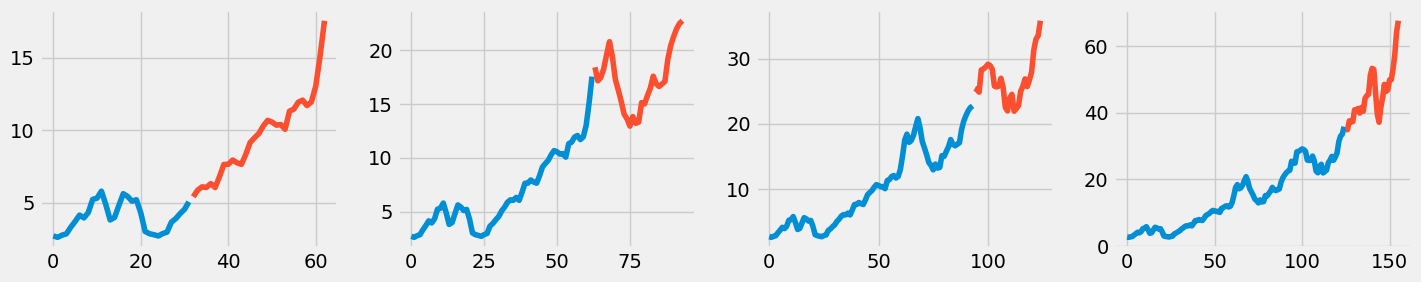

In [ ]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
plt.figure(1)
fig = plt.figure(figsize=(24, 10))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
	plt.subplot(360 + index)
	plt.plot(train)
	plt.plot([None for i in train] + [x for x in test])
    # pyplot.title(''.format())
	index += 1
plt.show()

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
import statsmodels.api as sm
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(14,6))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

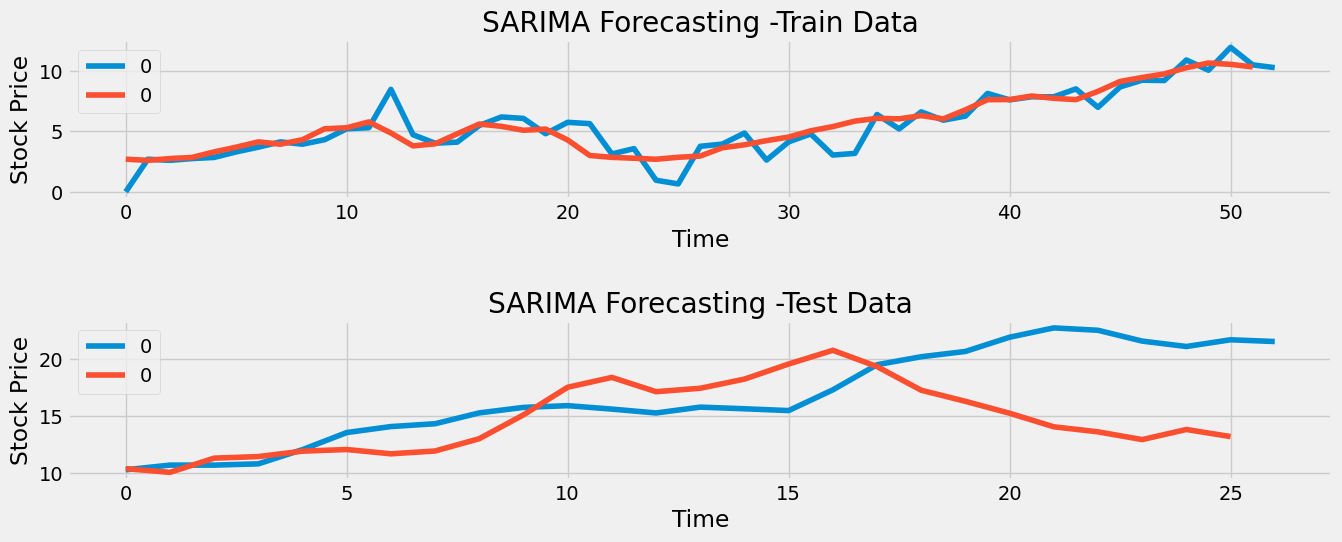

In [ ]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

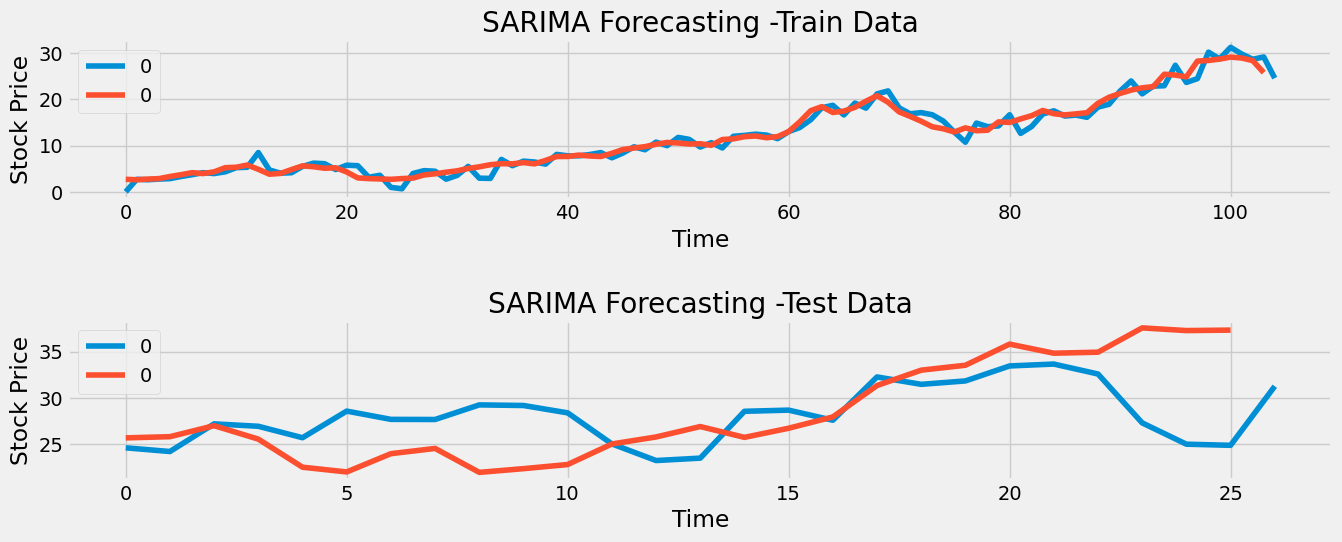

In [ ]:
## Backtest Set-2
backtest_model(train_list[4],test_list[4])

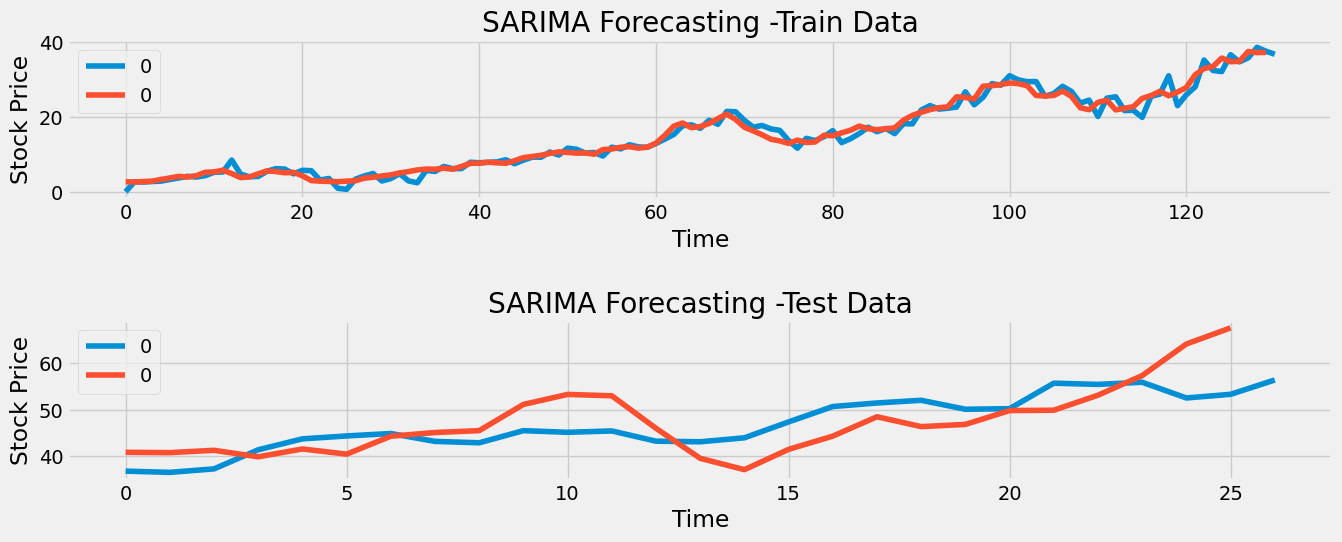

In [ ]:
## Backtest Set-3
backtest_model(train_list[5],test_list[5])

By using backtesting we can validate our model on multiple train-test splits.
Red is the training set and blue indicates test set.

In [ ]:
model = sm.tsa.SARIMAX(modelling_series,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2007-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

In [ ]:
sd='2007-01-31'
ed='2016-09-30'
sd2='2016-10-31'
ed2='2019-12-31'

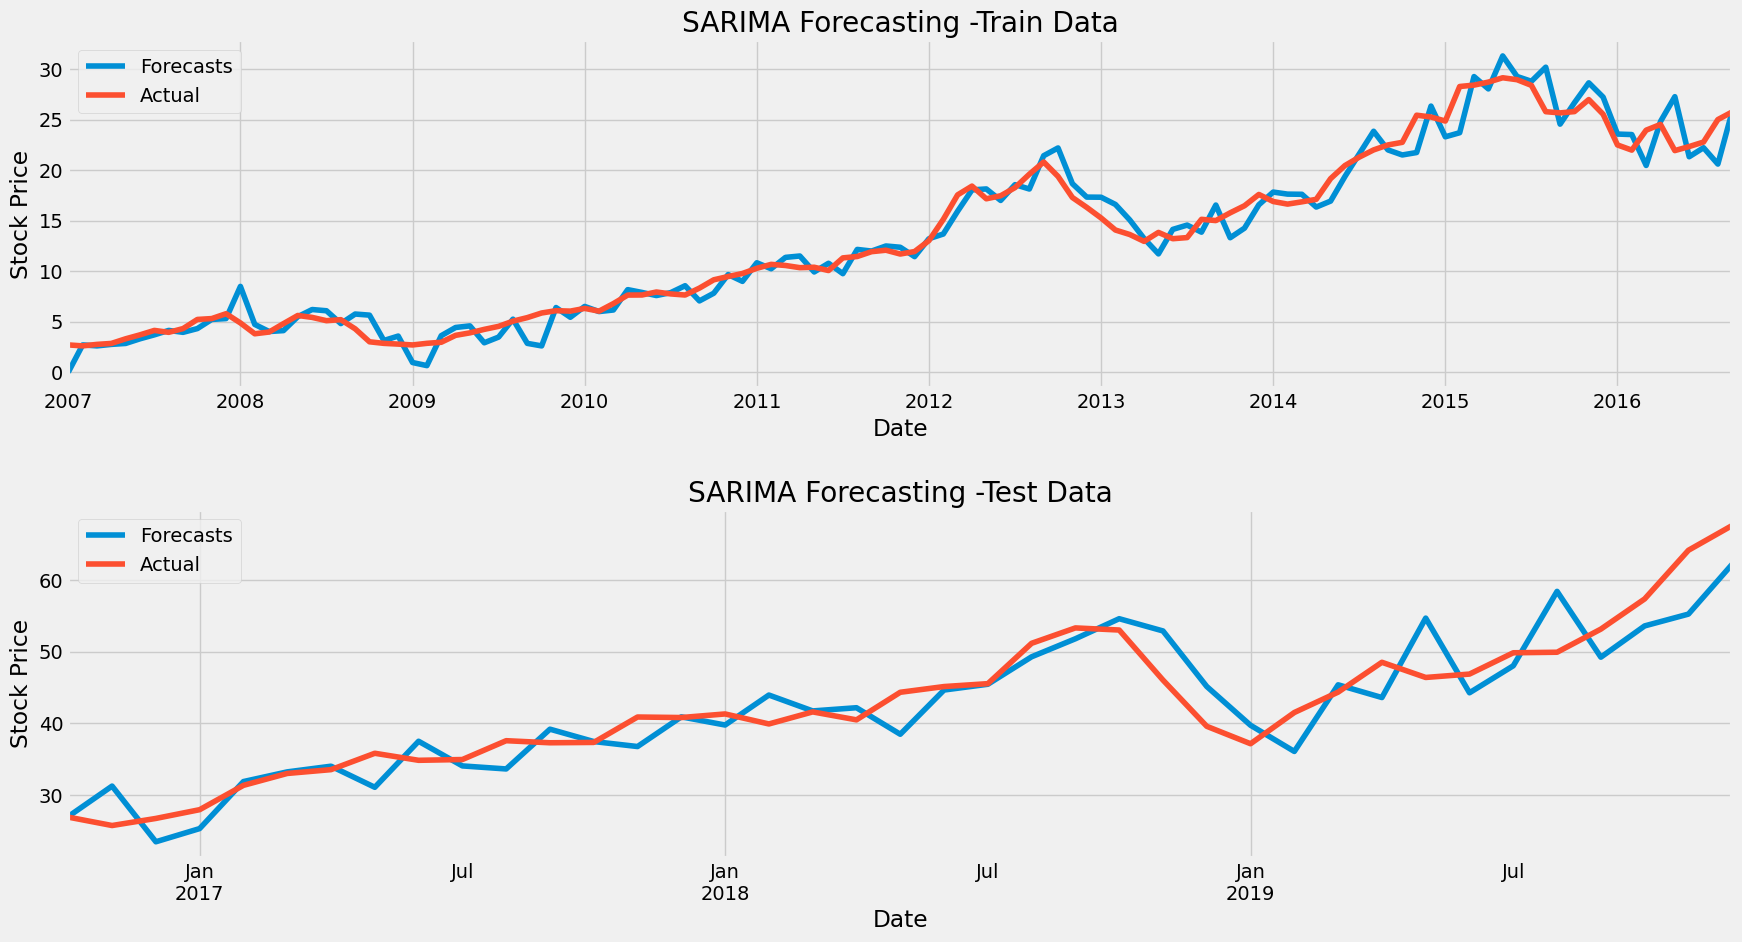

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
modelling_series.loc[sd:ed].plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
modelling_series.loc[sd2:ed2].plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(result_metrics(modelling_series[sd:ed],forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(modelling_series[sd2:ed2],forecasts_test,'SARIMA-Test Data'))

Result Metrics for SARIMA-Train Data
R2 Score :  0.964
Mean Squared Error :  2.426
Mean Absolute Error :  1.149
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.828
Mean Squared Error :  15.602
Mean Absolute Error :  3.068
None


In [ ]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(2, 2, [], 12)   Log Likelihood                -317.125
Date:                             Mon, 10 Apr 2023   AIC                            644.250
Time:                                     03:56:32   BIC                            658.626
Sample:                                 01-31-2007   HQIC                           650.092
                                      - 12-31-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1173      0.307      0.383      0.702      -0.484       0.718
ma.L1          0.1468      

# Conclusion
We have fit a SARIMA model capturing the trend, seasonality. The model seems to have a good fit. 
By adding external regressors we will be able to further improve the model.

#License

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.